In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
df=pd.read_csv('flight.csv')

In [6]:
df.head(8)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
5,2076,196,0,Yes,Yes,Yes,Friday,No,Yes,435.670,1623.74,4
6,1100,214,0,No,Yes,Yes,Wednesday,No,No,270.080,1279.40,2
7,2012,200,0,Yes,Yes,Yes,Friday,No,Yes,467.290,1687.73,4


### What do coach ticket prices look like?

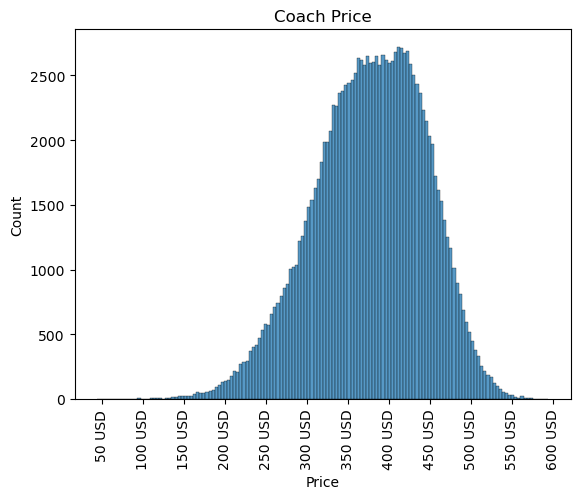

In [34]:
sns.histplot(df.coach_price)

price=np.arange(50,650,50)

plt.title('Coach Price')
plt.xticks(price,[f'{x} USD' for x in price], rotation='vertical')
plt.xlabel("Price")
plt.show()

### Now visualize the coach ticket prices for flights that are 8 hours long.

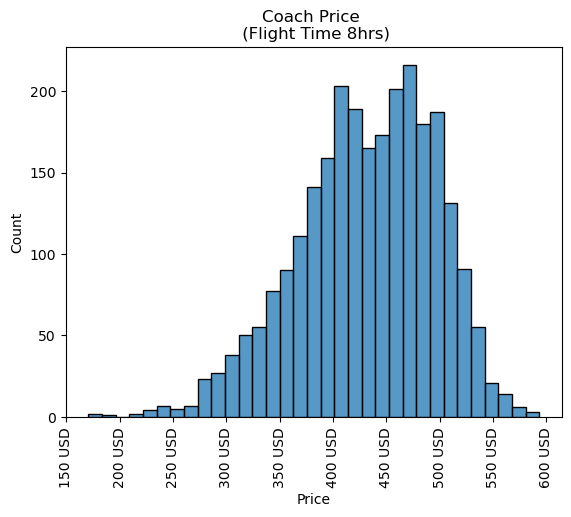

In [40]:
sns.histplot(df.coach_price[df.hours==8])
price2=np.arange(150,650,50)
plt.title('Coach Price \n (Flight Time 8hrs)')
plt.xticks(price2,[f'{x} USD' for x in price2], rotation='vertical')
plt.xlabel("Price")
plt.show()

### How are flight delay times distributed?

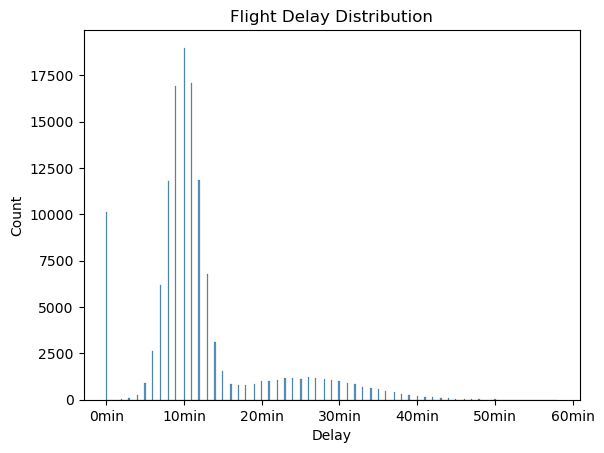

In [54]:
sns.histplot(df.delay[df.delay<60])
plt.title("Flight Delay Distribution")
minutes=np.arange(0,70,10)
plt.xticks(minutes,[f"{x}min" for x in minutes])
plt.xlabel('Delay')
plt.show()

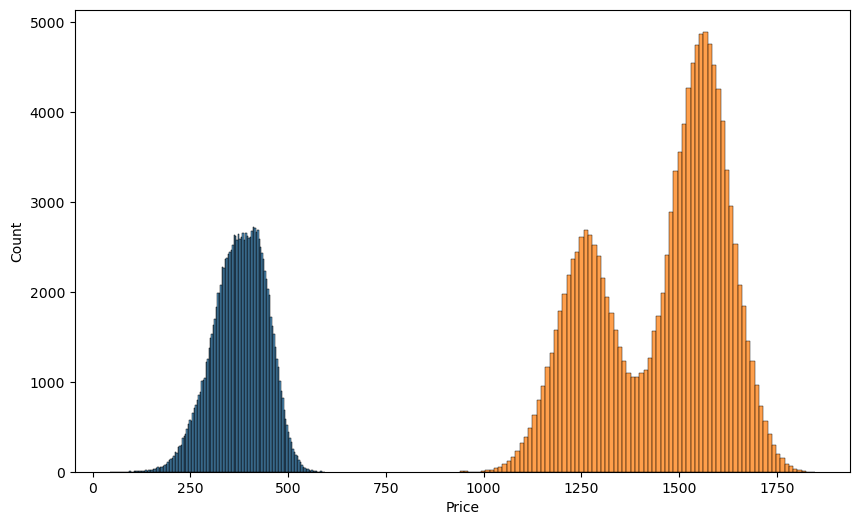

In [56]:
plt.figure(figsize=(10,6))

sns.histplot(df.coach_price)

sns.histplot(df.firstclass_price)

plt.xlabel('Price')

plt.show()

In [55]:
df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


### What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi?

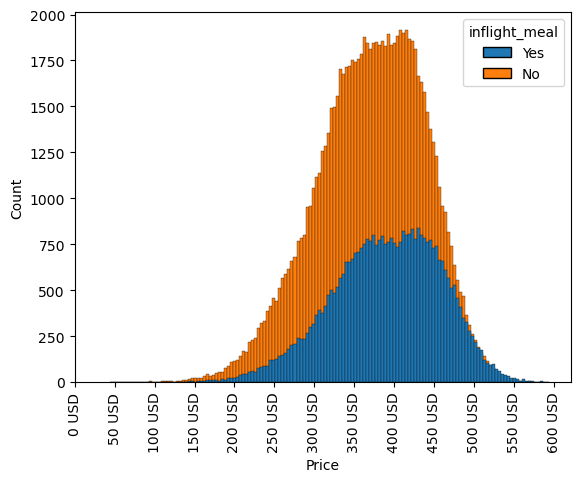

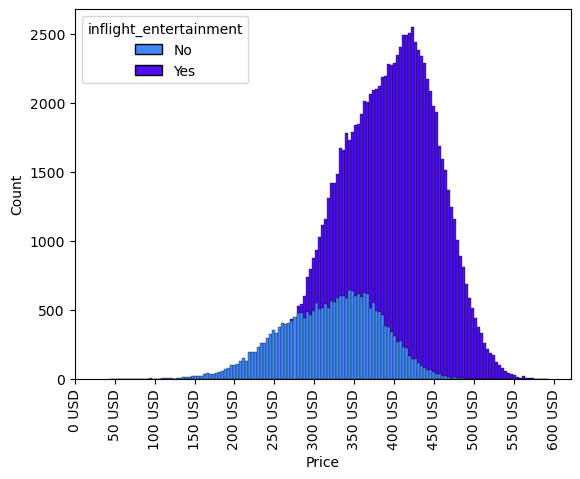

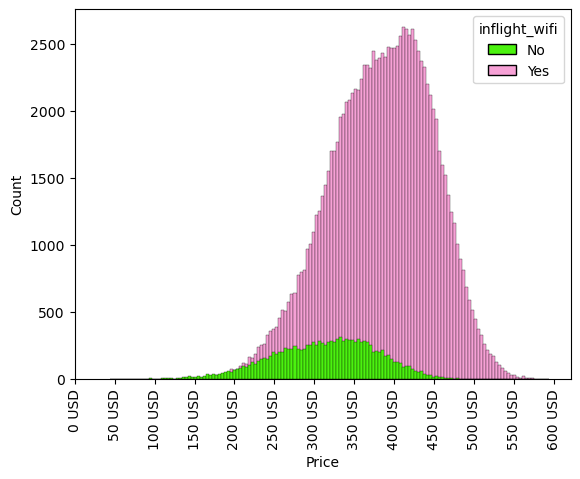

In [108]:
price3=np.arange(0,650,50)

df['inflight_meal'] = df['inflight_meal'].astype('category')
df['inflight_meal'] = df['inflight_meal'].cat.reorder_categories(['Yes', 'No'], ordered=True)

sns.histplot(x='coach_price', data=df, hue='inflight_meal',multiple="layer",alpha=1)
plt.xticks(price3,[f'{x} USD' for x in price3], rotation='vertical')
plt.xlabel('Price')
plt.show()
plt.close()

#############################

df['inflight_entertainment'] = df['inflight_entertainment'].astype('category')
df['inflight_entertainment'] = df['inflight_entertainment'].cat.reorder_categories(['No', 'Yes'], ordered=True)

sns.histplot(x='coach_price', data=df, hue='inflight_entertainment',palette=['#4287f5','#4f0ff2'],multiple="layer",alpha=1)
plt.xticks(price3,[f'{x} USD' for x in price3], rotation='vertical')
plt.xlabel('Price')
plt.show()
plt.close()

#############################

df['inflight_wifi'] = df['inflight_wifi'].astype('category')
df['inflight_wifi'] = df['inflight_wifi'].cat.reorder_categories(['No', 'Yes'], ordered=True)
sns.histplot(x='coach_price', data=df, hue='inflight_wifi',palette=['#4bf20f','#f7a1d6'], multiple="layer",alpha=1)
plt.xticks(price3,[f'{x} USD' for x in price3], rotation='vertical')
plt.xlabel('Price')
plt.show()
plt.close()




### How does the number of passengers change in relation to the length of flights?

<Figure size 1000x600 with 0 Axes>

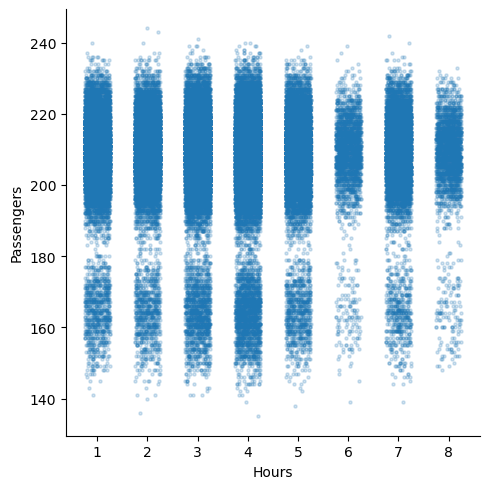

In [8]:
plt.figure(figsize=(10,6))
sns.lmplot(x='hours',y='passengers',data=df, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.xlabel('Hours')
plt.ylabel('Passengers')
plt.show()

### Visualize the difference between coach and first-class prices on weekends compared to weekdays.

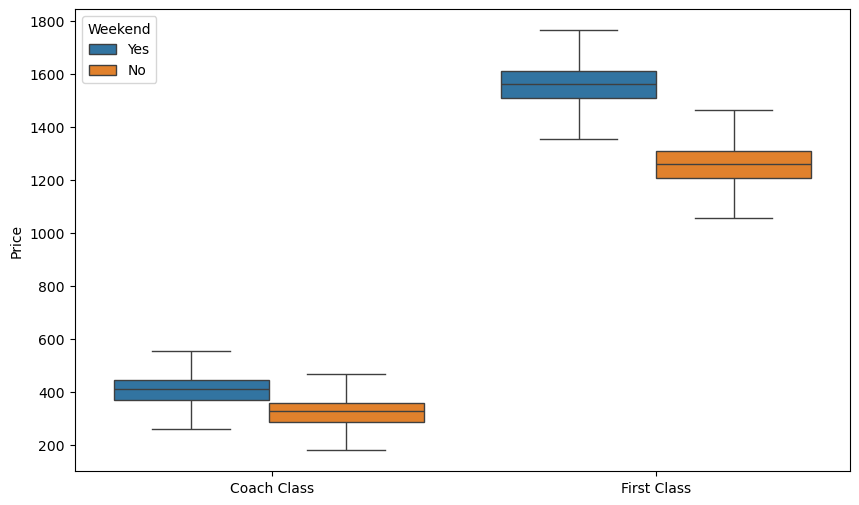

In [37]:
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x=1, y='coach_price', data=df, hue='weekend', showfliers=False)
sns.boxplot(x=2, y='firstclass_price', data=df, hue='weekend', showfliers=False, ax=ax)

ax.set_xticks([0.01, 1])
ax.set_xticklabels(['Coach Class', 'First Class'])

unique_labels = list(dict.fromkeys(labels))  # Usuń duplikaty etykiet
ax.legend(handles[:len(unique_labels)], unique_labels, title='Weekend', loc='upper left')

ax.set_ylabel('Price')

plt.show()


### How do coach prices differ for redeyes and non-redeyes on each day of the week?

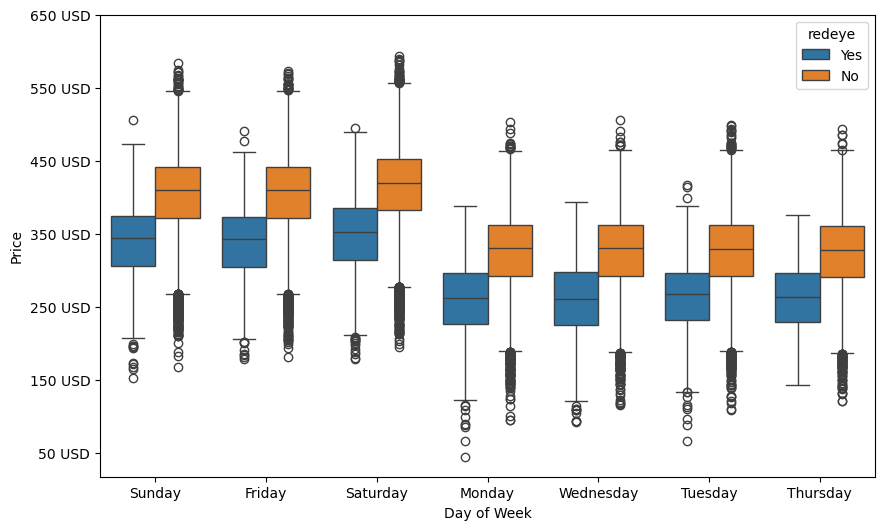

In [48]:
price4=np.arange(50,750,100)
plt.figure(figsize=(10,6))
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = df)
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.yticks(price4,[f"{x} USD" for x in price4])

plt.show()